## Importação das Bibliotecas 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date, datetime
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.api as sm

## Leitura da Planilha dos Desempregados 

In [2]:
desemprego = pd.read_excel('Desemprego-2010-2015.xlsx')

desemprego

,Sexo,Periodo,Range_Idade,Total_Desempregados
0,Masculino,2010-01-01,16 to 19 anos,200000
1,Masculino,2010-01-01,20 to 24 anos,480000
2,Masculino,2010-01-01,25 to 34 anos,690000
3,Masculino,2010-01-01,35 to 44 anos,551000
4,Masculino,2010-01-01,45 to 54 anos,563000
...,...,...,...,...
863,Feminino,2015-02-01,25 to 34 anos,294000
864,Feminino,2015-02-01,35 to 44 anos,235000
865,Feminino,2015-02-01,45 to 54 anos,253000
866,Feminino,2015-02-01,55 to 64 anos,170000


In [3]:
## Conversão de Data para Mês, Dia e Ano
desemprego['Periodo'] = pd.to_datetime(desemprego['Periodo'])
desemprego['Ano'] = desemprego['Periodo'].dt.year
desemprego['Mês'] = desemprego['Periodo'].dt.month
desemprego['Dia'] = desemprego['Periodo'].dt.day

In [4]:
desemprego

,Sexo,Periodo,Range_Idade,Total_Desempregados,Ano,Mês,Dia
0,Masculino,2010-01-01,16 to 19 anos,200000,2010,1,1
1,Masculino,2010-01-01,20 to 24 anos,480000,2010,1,1
2,Masculino,2010-01-01,25 to 34 anos,690000,2010,1,1
3,Masculino,2010-01-01,35 to 44 anos,551000,2010,1,1
4,Masculino,2010-01-01,45 to 54 anos,563000,2010,1,1
...,...,...,...,...,...,...,...
863,Feminino,2015-02-01,25 to 34 anos,294000,2015,2,1
864,Feminino,2015-02-01,35 to 44 anos,235000,2015,2,1
865,Feminino,2015-02-01,45 to 54 anos,253000,2015,2,1
866,Feminino,2015-02-01,55 to 64 anos,170000,2015,2,1


In [5]:
## Verificação de dados nullos 
desemprego.isna().sum()

Sexo                   0
Periodo                0
Range_Idade            0
Total_Desempregados    0
Ano                    0
Mês                    0
Dia                    0
dtype: int64

In [6]:
## Verificação de dados duplicados 
desemprego.duplicated().sum()

0

## Geral

### 1º) Qual é o total de desempregados no periodo abrangido pela planilha: 

** Ano

In [7]:
total_ano = desemprego.groupby(["Ano"])["Total_Desempregados"].sum().rename("Total por Ano")

analise_total_ano = pd.DataFrame({"Total por Ano" : total_ano})

analise_total_ano['Total por Ano'] = analise_total_ano['Total por Ano'].map(lambda x : "{:,.2f}".format(x)) 
analise_total_ano

,Total por Ano
Ano,
2010,"62,858,000.00"
2011,"73,446,000.00"
2012,"78,130,000.00"
2013,"52,902,000.00"
2014,"39,854,000.00"
2015,"5,849,000.00"


** Mês

In [8]:
total_mes = desemprego.groupby(["Mês"])["Total_Desempregados"].sum().rename("Total por Mês")

analise_total_mes = pd.DataFrame({"Total por Mês" : total_mes})

analise_total_mes['Total por Mês'] = analise_total_mes['Total por Mês'].map(lambda x : "{:,.2f}".format(x)) 
analise_total_mes

,Total por Mês
Mês,
1,"30,288,000.00"
2,"29,873,000.00"
3,"27,245,000.00"
4,"26,774,000.00"
5,"26,400,000.00"
6,"25,435,000.00"
7,"26,068,000.00"
8,"25,193,000.00"
9,"24,683,000.00"


** Dia

In [9]:
total_dia = desemprego.groupby(["Dia"])["Total_Desempregados"].sum().rename("Total por Dia")

analise_total_dia = pd.DataFrame({"Total por Dia" : total_dia})

analise_total_dia['Total por Dia'] = analise_total_dia['Total por Dia'].map(lambda x : "{:,.2f}".format(x)) 
analise_total_dia

,Total por Dia
Dia,
1,"313,039,000.00"


### 2º)  Como o desemprego varia ao longo dos diferentes periodos registrados:

In [10]:
## Ordenação por período 
desemprego_ordenacao = desemprego.sort_values(by='Periodo') 

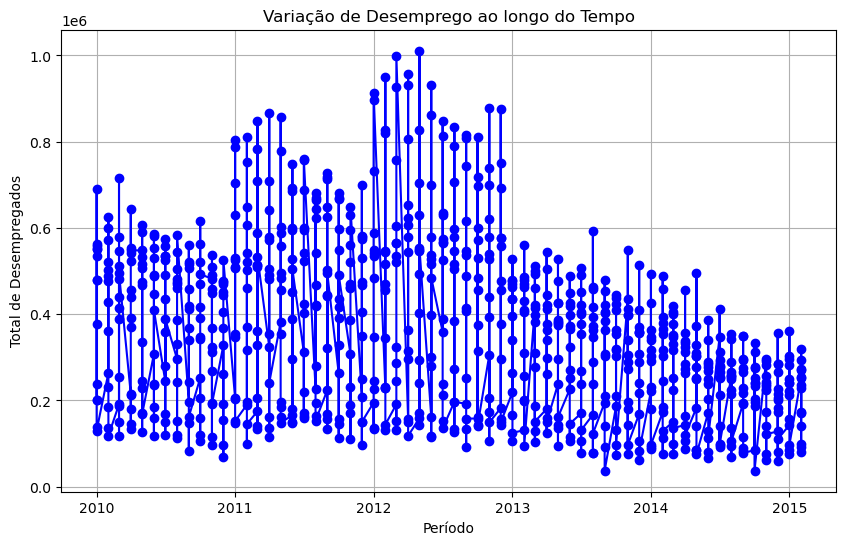

In [11]:
## Visualização de desemprego ao longo do tempo 
plt.figure(figsize=(10,6)) 
plt.plot(desemprego_ordenacao['Periodo'], desemprego_ordenacao['Total_Desempregados'], marker='o', linestyle='-', color='b')
plt.title('Variação de Desemprego ao longo do Tempo')
plt.xlabel('Período') 
plt.ylabel('Total de Desempregados') 
plt.grid(True) 
plt.show()

## Segmentação por Sexo

### 1º) Qual é a distribuição de desempregados entre os diferentes sexo: 

** Ano

In [12]:
sexo_ano = desemprego.groupby(["Ano", "Sexo"])["Total_Desempregados"].sum().rename("Total por Sexo e Ano")

analise_sexo_ano = pd.DataFrame({"Total por Sexo e Ano" : sexo_ano})

analise_sexo_ano['Total por Sexo e Ano'] = analise_sexo_ano['Total por Sexo e Ano'].map(lambda x : "{:,.2f}".format(x)) 
analise_sexo_ano
## analise_sexo_ano.sort_values(by=['Total por Sexo e Ano'])

Total por Sexo e Ano
Ano  Sexo                          
2010 Feminino         29,051,000.00
     Masculino        33,807,000.00
2011 Feminino         32,781,000.00
     Masculino        40,665,000.00
2012 Feminino         32,003,000.00
     Masculino        46,127,000.00
2013 Feminino         24,070,000.00
     Masculino        28,832,000.00
2014 Feminino         18,670,000.00
     Masculino        21,184,000.00
2015 Feminino          2,773,000.00
     Masculino         3,076,000.00

** Mês

In [13]:
sexo_mes = desemprego.groupby(["Mês", "Sexo"])["Total_Desempregados"].sum().rename("Total por Sexo e Mês")

analise_sexo_mes = pd.DataFrame({"Total por Sexo e Mês" : sexo_mes})

analise_sexo_mes['Total por Sexo e Mês'] = analise_sexo_mes['Total por Sexo e Mês'].map(lambda x : "{:,.2f}".format(x)) 
analise_sexo_mes
## analise_sexo_ano.sort_values(by=['Total por Sexo e Ano'])

Total por Sexo e Mês
Mês Sexo                          
1   Feminino         13,256,000.00
    Masculino        17,032,000.00
2   Feminino         12,996,000.00
    Masculino        16,877,000.00
3   Feminino         11,577,000.00
    Masculino        15,668,000.00
4   Feminino         11,467,000.00
    Masculino        15,307,000.00
5   Feminino         11,544,000.00
    Masculino        14,856,000.00
6   Feminino         11,245,000.00
    Masculino        14,190,000.00
7   Feminino         12,100,000.00
    Masculino        13,968,000.00
8   Feminino         11,621,000.00
    Masculino        13,572,000.00
9   Feminino         11,312,000.00
    Masculino        13,371,000.00
10  Feminino         11,098,000.00
    Masculino        13,015,000.00
11  Feminino         10,754,000.00
    Masculino        13,102,000.00
12  Feminino         10,378,000.00
    Masculino        12,733,000.00

** Dia

In [14]:
sexo_dia = desemprego.groupby(["Dia", "Sexo"])["Total_Desempregados"].sum().rename("Total por Sexo e Dia")

analise_sexo_dia = pd.DataFrame({"Total por Sexo e Dia" : sexo_dia})

analise_sexo_dia['Total por Sexo e Dia'] = analise_sexo_dia['Total por Sexo e Dia'].map(lambda x : "{:,.2f}".format(x)) 
analise_sexo_dia
## analise_sexo_ano.sort_values(by=['Total por Sexo e Ano'])

Total por Sexo e Dia
Dia Sexo                          
1   Feminino        139,348,000.00
    Masculino       173,691,000.00

### 2) Existe uma diferença significativa na taxa de desemprego entre homens e mulheres:

In [15]:
desemprego_masculino = desemprego[desemprego['Sexo'] == 'Masculino']['Total_Desempregados']
desemprego_feminino = desemprego[desemprego['Sexo'] == 'Feminino']['Total_Desempregados']

In [16]:
## Execução do Teste de Studente 
resultado_teste_t, valor_p = ttest_ind(desemprego_masculino, desemprego_feminino, equal_var=False)

In [17]:
## Comparação de valor com um limiar de 0.05 
limiar_significancia = 0.05

In [18]:
if valor_p < limiar_significancia: 
    
    print(f'Há uma diferença significativa na taxa de desemprego entre homens e mulheres (p-value = {valor_p})')
    
else: 
    
    print(f'Não há evidência de diferença significativa na taxa de desemprego entre homens e mulheres (p-value = {valor_p.round(3)})')

Há uma diferença significativa na taxa de desemprego entre homens e mulheres (p-value = 2.315659147330825e-09)


## Análise por Faixa Etária 

### 1º) Como o desemprego está distribuído entre as diferentes faixas etárias: 

** Ano

In [19]:
## Agrupamento por ano e faixa etária, com o total de desempregados por Ano 
total_faixa_etaria_ano = desemprego.groupby(["Ano", "Range_Idade"])["Total_Desempregados"].sum().rename("Total Faixa Etária por Ano")
proporcoes_por_faixa_etaria = total_faixa_etaria_ano / total_faixa_etaria_ano.groupby('Ano').transform('sum')

analise_faixa_etaria_ano = pd.DataFrame({"Total Faixa Etária por Ano" : total_faixa_etaria_ano, 
                                         "Distribuição de Faixa Etária por Ano" : proporcoes_por_faixa_etaria.round(3)}) 

analise_faixa_etaria_ano["Total Faixa Etária por Ano"] = analise_faixa_etaria_ano["Total Faixa Etária por Ano"].map(lambda x : "{:,.2f}".format(x))

analise_faixa_etaria_ano

Total Faixa Etária por Ano  \
Ano  Range_Idade                                  
2010 16 to 19 anos                 3,405,000.00   
     20 to 24 anos                 8,129,000.00   
     25 to 34 anos                13,301,000.00   
     35 to 44 anos                11,558,000.00   
     45 to 54 anos                12,892,000.00   
     55 to 64 anos                 9,333,000.00   
     65 anos e acima               4,240,000.00   
2011 16 to 19 anos                 3,820,000.00   
     20 to 24 anos                 9,300,000.00   
     25 to 34 anos                16,338,000.00   
     35 to 44 anos                13,681,000.00   
     45 to 54 anos                15,553,000.00   
     55 to 64 anos                10,473,000.00   
     65 anos e acima               4,281,000.00   
2012 16 to 19 anos                 4,185,000.00   
     20 to 24 anos                 9,552,000.00   
     25 to 34 anos                17,294,000.00   
     35 to 44 anos                15,120,000.00   
     45 to 54 anos                17,235,000.00   
     55 to 64 anos                10,798,000.00   
     65 anos e acima               3,946,000.00   
2013 16 to 19 anos                 2,795,000.00   
     20 to 24 anos                 7,335,000.00   
     25 to 34 anos                11,318,000.00   
     35 to 44 anos                 9,601,000.00   
     45 to 54 anos                10,318,000.00   
     55 to 64 anos                 7,981,000.00   
     65 anos e acima               3,554,000.00   
2014 16 to 19 anos                 2,109,000.00   
     20 to 24 anos                 5,471,000.00   
     25 to 34 anos                 8,918,000.00   
     35 to 44 anos                 6,763,000.00   
     45 to 54 anos                 7,362,000.00   
     55 to 64 anos                 5,975,000.00   
     65 anos e acima               3,256,000.00   
2015 16 to 19 anos                   333,000.00   
     20 to 24 anos                   780,000.00   
     25 to 34 anos                 1,277,000.00   
     35 to 44 anos                 1,027,000.00   
     45 to 54 anos                 1,071,000.00   
     55 to 64 anos                   833,000.00   
     65 anos e acima                 528,000.00   

                      Distribuição de Faixa Etária por Ano  
Ano  Range_Idade                                            
2010 16 to 19 anos                                   0.054  
     20 to 24 anos                                   0.129  
     25 to 34 anos                                   0.212  
     35 to 44 anos                                   0.184  
     45 to 54 anos                                   0.205  
     55 to 64 anos                                   0.148  
     65 anos e acima                                 0.067  
2011 16 to 19 anos                                   0.052  
     20 to 24 anos                                   0.127  
     25 to 34 anos                                   0.222  
     35 to 44 anos                                   0.186  
     45 to 54 anos                                   0.212  
     55 to 64 anos                                   0.143  
     65 anos e acima                                 0.058  
2012 16 to 19 anos                                   0.054  
     20 to 24 anos                                   0.122  
     25 to 34 anos                                   0.221  
     35 to 44 anos                                   0.194  
     45 to 54 anos                                   0.221  
     55 to 64 anos                                   0.138  
     65 anos e acima                                 0.051  
2013 16 to 19 anos                                   0.053  
     20 to 24 anos                                   0.139  
     25 to 34 anos                                   0.214  
     35 to 44 anos                                   0.181  
     45 to 54 anos                                   0.195  
     55 to 64 anos                                   0.151  
     65

** Mes 

In [20]:
## Agrupamento por mês e faixa etária, com o total de desempregados por Mês 
total_faixa_etaria_mes = desemprego.groupby(["Mês", "Range_Idade"])["Total_Desempregados"].sum().rename("Total Faixa Etária por Mês")
proporcoes_por_faixa_etaria_mes = total_faixa_etaria_mes / total_faixa_etaria_mes.groupby('Mês').transform('sum')

analise_faixa_etaria_mes = pd.DataFrame({"Total Faixa Etária por Mês" : total_faixa_etaria_mes, 
                                         "Distribuição de Faixa Etária por Mês" : proporcoes_por_faixa_etaria_mes.round(3)}) 

analise_faixa_etaria_mes["Total Faixa Etária por Mês"] = analise_faixa_etaria_mes["Total Faixa Etária por Mês"].map(lambda x : "{:,.2f}".format(x))

analise_faixa_etaria_mes.head(60)

Total Faixa Etária por Mês  \
Mês Range_Idade                                  
1   16 to 19 anos                 1,670,000.00   
    20 to 24 anos                 4,005,000.00   
    25 to 34 anos                 6,438,000.00   
    35 to 44 anos                 5,684,000.00   
    45 to 54 anos                 6,268,000.00   
    55 to 64 anos                 4,334,000.00   
    65 anos e acima               1,889,000.00   
2   16 to 19 anos                 1,686,000.00   
    20 to 24 anos                 3,938,000.00   
    25 to 34 anos                 6,394,000.00   
    35 to 44 anos                 5,582,000.00   
    45 to 54 anos                 6,199,000.00   
    55 to 64 anos                 4,167,000.00   
    65 anos e acima               1,907,000.00   
3   16 to 19 anos                 1,603,000.00   
    20 to 24 anos                 3,603,000.00   
    25 to 34 anos                 5,828,000.00   
    35 to 44 anos                 5,036,000.00   
    45 to 54 anos                 5,718,000.00   
    55 to 64 anos                 3,968,000.00   
    65 anos e acima               1,489,000.00   
4   16 to 19 anos                 1,587,000.00   
    20 to 24 anos                 3,541,000.00   
    25 to 34 anos                 5,939,000.00   
    35 to 44 anos                 4,818,000.00   
    45 to 54 anos                 5,557,000.00   
    55 to 64 anos                 3,805,000.00   
    65 anos e acima               1,527,000.00   
5   16 to 19 anos                 1,466,000.00   
    20 to 24 anos                 3,377,000.00   
    25 to 34 anos                 5,944,000.00   
    35 to 44 anos                 4,785,000.00   
    45 to 54 anos                 5,423,000.00   
    55 to 64 anos                 3,813,000.00   
    65 anos e acima               1,592,000.00   
6   16 to 19 anos                 1,404,000.00   
    20 to 24 anos                 3,336,000.00   
    25 to 34 anos                 5,631,000.00   
    35 to 44 anos                 4,735,000.00   
    45 to 54 anos                 5,110,000.00   
    55 to 64 anos                 3,582,000.00   
    65 anos e acima               1,637,000.00   
7   16 to 19 anos                 1,396,000.00   
    20 to 24 anos                 3,408,000.00   
    25 to 34 anos                 5,715,000.00   
    35 to 44 anos                 4,783,000.00   
    45 to 54 anos                 5,312,000.00   
    55 to 64 anos                 3,730,000.00   
    65 anos e acima               1,724,000.00   
8   16 to 19 anos                 1,289,000.00   
    20 to 24 anos                 3,255,000.00   
    25 to 34 anos                 5,428,000.00   
    35 to 44 anos                 4,753,000.00   
    45 to 54 anos                 5,165,000.00   
    55 to 64 anos                 3,600,000.00   
    65 anos e acima               1,703,000.00   
9   16 to 19 anos                 1,121,000.00   
    20 to 24 anos                 3,037,000.00   
    25 to 34 anos                 5,546,000.00   
    35 to 44 anos                 4,601,000.00   

                     Distribuição de Faixa Etária por Mês  
Mês Range_Idade                                            
1   16 to 19 anos                                   0.055  
    20 to 24 anos                                   0.132  
    25 to 34 anos                                   0.213  
    35 to 44 anos                                   0.188  
    45 to 54 anos                                   0.207  
    55 to 64 anos                                   0.143  
    65 anos e acima                                 0.062  
2   16 to 19 anos                                   0.056  
    20 to 24 anos                                   0.132  
    25 to 34 anos                                   0.214  
    35 to 44 anos                                   0.187  
    45 to 54 anos                                   0.208  
    55 to 64 anos                                   0.139  
    65 anos e acima

** Dia

In [21]:
## Agrupamento por mês e faixa etária, com o total de desempregados por Dia 
total_faixa_etaria_dia = desemprego.groupby(["Dia", "Range_Idade"])["Total_Desempregados"].sum().rename("Total Faixa Etária por Dia")
proporcoes_por_faixa_etaria_dia = total_faixa_etaria_dia / total_faixa_etaria_dia.groupby('Dia').transform('sum')

analise_faixa_etaria_dia = pd.DataFrame({"Total Faixa Etária por Dia" : total_faixa_etaria_dia, 
                                         "Distribuição de Faixa Etária por Dia" : proporcoes_por_faixa_etaria_dia.round(3)}) 

analise_faixa_etaria_dia["Total Faixa Etária por Dia"] = analise_faixa_etaria_dia["Total Faixa Etária por Dia"].map(lambda x : "{:,.2f}".format(x))

analise_faixa_etaria_dia.head(60)

Total Faixa Etária por Dia  \
Dia Range_Idade                                  
1   16 to 19 anos                16,647,000.00   
    20 to 24 anos                40,567,000.00   
    25 to 34 anos                68,446,000.00   
    35 to 44 anos                57,750,000.00   
    45 to 54 anos                64,431,000.00   
    55 to 64 anos                45,393,000.00   
    65 anos e acima              19,805,000.00   

                     Distribuição de Faixa Etária por Dia  
Dia Range_Idade                                            
1   16 to 19 anos                                   0.053  
    20 to 24 anos                                   0.130  
    25 to 34 anos                                   0.219  
    35 to 44 anos                                   0.184  
    45 to 54 anos                                   0.206  
    55 to 64 anos                                   0.145  
    65 anos e acima                                 0.063

### 2º) Como o desemprego está distribuído entre as diferentes faixas etárias:

** Ano 

In [22]:
## Agrupamento de faixa etária e Ano para calcular a média de Total de desempregos por Ano
taxa_desemprego_por_faixa_etaria_ano = desemprego.groupby(["Ano", "Range_Idade"])["Total_Desempregados"].mean().rename("Média de Desempre Faixa Etária em Ano")

In [23]:
## Taxa de desemprego mais alta 
faixa_etaria_max_desemprego_ano = taxa_desemprego_por_faixa_etaria_ano.idxmax() 
taxa_max_desemprego_ano = taxa_desemprego_por_faixa_etaria_ano.max()

In [24]:
print(f'A faixa etária com a taxa de desemprego mais alta é "{faixa_etaria_max_desemprego_ano}" com uma taxa média de {taxa_max_desemprego_ano:.2f}')

A faixa etária com a taxa de desemprego mais alta é "(2012, '25 to 34 anos')" com uma taxa média de 720583.33


** Mês

In [25]:
## Agrupamento de faixa etária e Mês para calcular a média de Total de desempregos por  
taxa_desemprego_por_faixa_etaria_mes = desemprego.groupby(["Mês", "Range_Idade"])["Total_Desempregados"].mean().rename("Média de Desempre Faixa Etária em Mês")

In [26]:
## Taxa de desemprego mais alta por mês
faixa_etaria_max_desemprego_mes = taxa_desemprego_por_faixa_etaria_mes.idxmax() 
taxa_max_desemprego_mes = taxa_desemprego_por_faixa_etaria_mes.max()

In [27]:
print(f'A faixa etária com a taxa de desemprego mais alta no mês é: "{faixa_etaria_max_desemprego_mes}" com uma taxa média de {taxa_max_desemprego_mes:.2f}')

A faixa etária com a taxa de desemprego mais alta no mês é: "(5, '25 to 34 anos')" com uma taxa média de 594400.00


** Dia

In [28]:
## Agrupamento de faixa etária e Dia para calcular a média de Total de desempregos por Dia
taxa_desemprego_por_faixa_etaria_dia = desemprego.groupby(["Dia", "Range_Idade"])["Total_Desempregados"].mean().rename("Média de Desempre Faixa Etária em Dia")

In [29]:
## Taxa de desemprego mais alta por dia
faixa_etaria_max_desemprego_dia = taxa_desemprego_por_faixa_etaria_dia.idxmax() 
taxa_max_desemprego_dia = taxa_desemprego_por_faixa_etaria_dia.max()

In [30]:
print(f'A faixa etária com a taxa de desemprego mais alta no dia é: "{faixa_etaria_max_desemprego_dia}" com uma taxa média de {taxa_max_desemprego_dia:.2f}')

A faixa etária com a taxa de desemprego mais alta no dia é: "(1, '25 to 34 anos')" com uma taxa média de 551983.87


### Tendências Temporais

### 1º) Há alguma tendência específica ao longo dos diferentes períodos em termos de desemprego: 


## Periodo

In [31]:
## Ordenação dos dados
dados_tempo = desemprego.sort_values(by='Periodo')

In [32]:
## Variável constante para a regressão
dados_tempo['Tempo'] = range(1, len(desemprego) + 1)

In [33]:
## Constante para a regressão 
dados_tempo = sm.add_constant(dados_tempo)

In [34]:
## Regressão linear 
modelo = sm.OLS(dados_tempo['Total_Desempregados'], sm.add_constant(dados_tempo['Tempo'])) 
resultado_regressao = modelo.fit()

In [35]:
## Visualizar os resultados da regressão 
print(resultado_regressao.summary())

                             OLS Regression Results                            
Dep. Variable:     Total_Desempregados   R-squared:                       0.103
Model:                             OLS   Adj. R-squared:                  0.102
Method:                  Least Squares   F-statistic:                     99.43
Date:                 Tue, 05 Dec 2023   Prob (F-statistic):           3.04e-22
Time:                         15:20:52   Log-Likelihood:                -11765.
No. Observations:                  868   AIC:                         2.353e+04
Df Residuals:                      866   BIC:                         2.354e+04
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.701e+05   1.27e+04     37.10

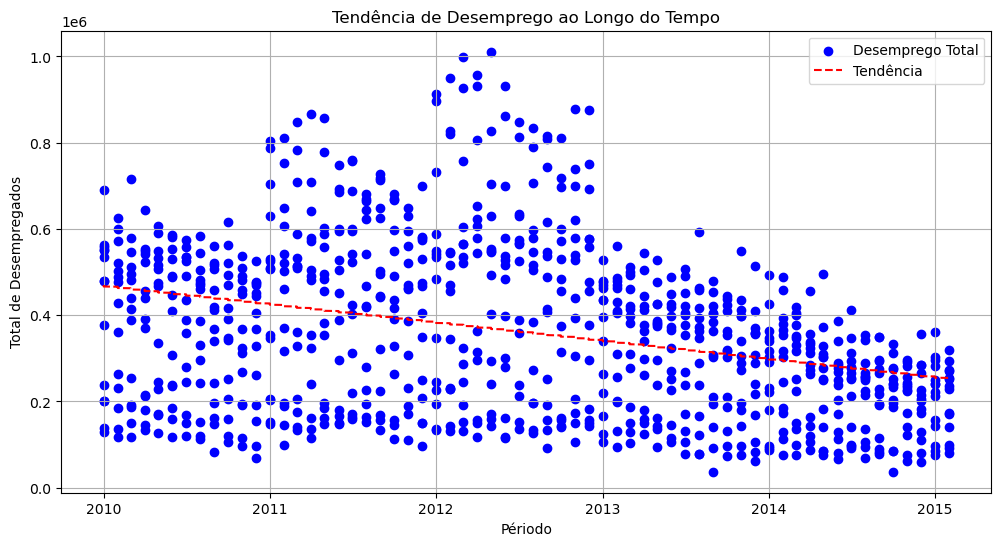

In [36]:
## Gráfico para visualizar a tendência de desemprego 
plt.figure(figsize=(12,6)) 
plt.scatter(desemprego['Periodo'], desemprego['Total_Desempregados'], label='Desemprego Total', marker='o', color='b')
plt.plot(desemprego['Periodo'], resultado_regressao.predict(sm.add_constant(dados_tempo['Tempo'])), label='Tendência', linestyle='--', color='r') 
plt.title('Tendência de Desemprego ao Longo do Tempo') 
plt.xlabel('Périodo') 
plt.ylabel('Total de Desempregados')
plt.legend()
plt.grid(True) 
plt.show()

### 2º) Existe alguma estação do ano ou ano especifico que se destaca em termos de desemprego

In [37]:
## Média de desemprego por mês para padrões sazonais
media_desemprego_por_mes = desemprego.groupby('Mês')['Total_Desempregados'].mean()

In [38]:
## Média de desemprego por ano para tendências anuais
media_desemprego_por_ano = desemprego.groupby('Ano')['Total_Desempregados'].mean()

In [39]:
## Gŕafico para padrões sazonais e tendências anuais 

Text(0, 0.5, 'Média de Desempregados')

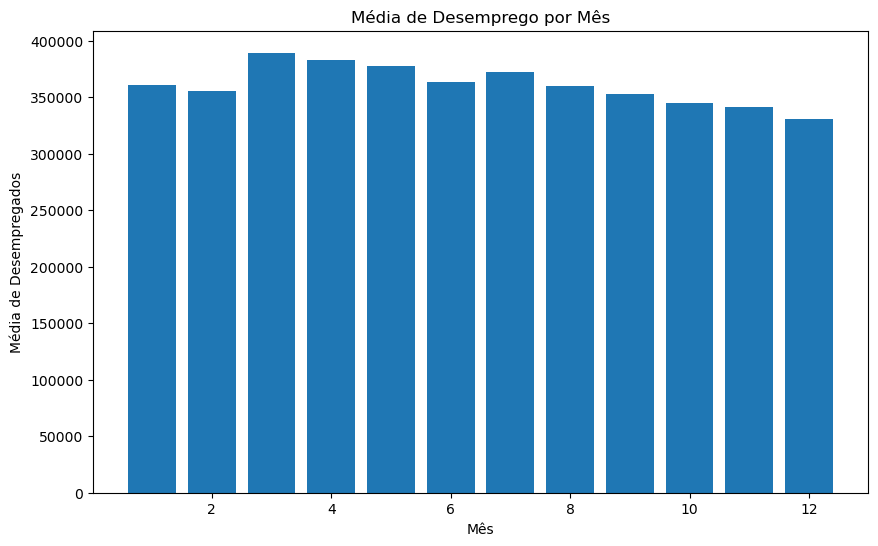

In [40]:
plt.figure(figsize=(10, 6))
plt.bar(media_desemprego_por_mes.index, media_desemprego_por_mes)
plt.title('Média de Desemprego por Mês')
plt.xlabel('Mês')
plt.ylabel('Média de Desempregados')

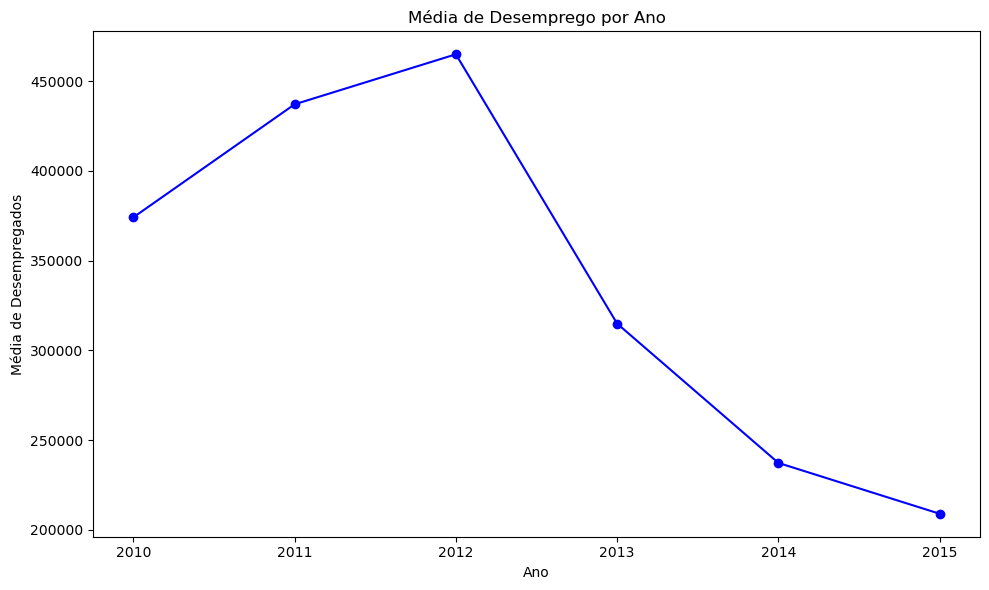

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(media_desemprego_por_ano.index, media_desemprego_por_ano, marker='o', linestyle='-', color='b')
plt.title('Média de Desemprego por Ano')
plt.xlabel('Ano')
plt.ylabel('Média de Desempregados')

plt.tight_layout()
plt.show()

### Relação entre Sexo e Faixa Etária 

### 1º)  Qual é a distribuição de desempregos em diferentes faixas etárias considerando o sexo: 

In [42]:
# tabela dinâmica (pivot table) para obter os dados necessários
tabela_pivot = pd.pivot_table(desemprego, values='Total_Desempregados', index='Periodo', columns=['Range_Idade', 'Sexo'], aggfunc='sum')

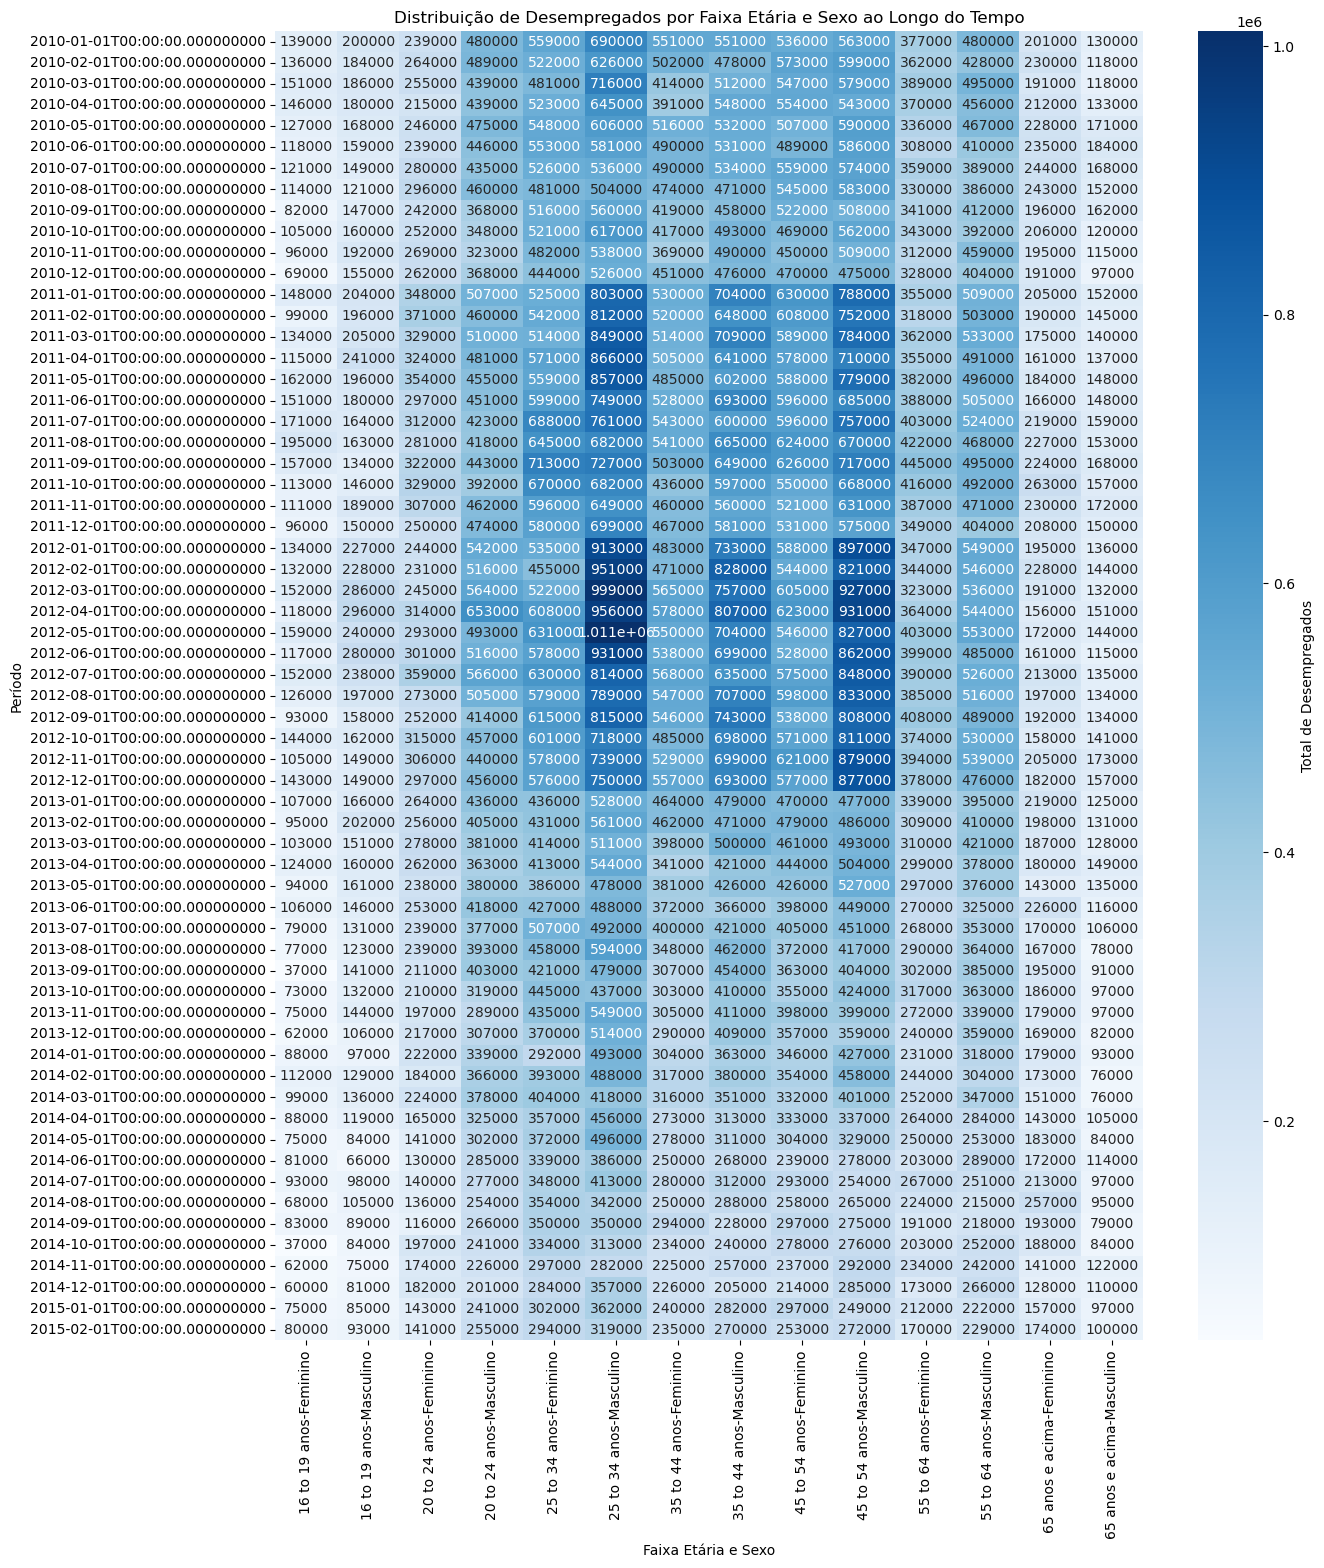

In [43]:
## Gráfico de calor
plt.figure(figsize=(14, 17))
sns.heatmap(tabela_pivot, cmap='Blues', annot=True, fmt='g', cbar_kws={'label': 'Total de Desempregados'})
plt.title('Distribuição de Desempregados por Faixa Etária e Sexo ao Longo do Tempo')
plt.xlabel('Faixa Etária e Sexo')
plt.ylabel('Período')
plt.show()


### 2º) Há alguma faixa etária em que a disparidade entre os sexos seja mais pronunciada: 

In [44]:
## Tabela Dinâmica para obter os dados necessários 
tabela_pivot = pd.pivot_table(desemprego, values='Total_Desempregados', index='Range_Idade', columns='Sexo', aggfunc='sum')

In [45]:
## Cálculo da diferença absoluta entre os sexos por faixa etária
tabela_pivot['Diferenca_Absoluta'] = tabela_pivot['Masculino'] - tabela_pivot['Feminino']

In [46]:
## Cálculo da diferença relativa (proporção) entre os sexos para cada faixa etária 
tabela_pivot['Diferenca_Relativa'] = (tabela_pivot['Masculino'] - tabela_pivot['Feminino']) / tabela_pivot[['Masculino', 'Feminino']].max(axis=1)

In [47]:
## Faixa etária com a maior diferença absoluta 
faixa_etaria_max_dif_absoluta = tabela_pivot['Diferenca_Absoluta'].idxmax() 
dif_absoluta_max = tabela_pivot.loc[faixa_etaria_max_dif_absoluta, 'Diferenca_Absoluta']

In [48]:
## Faixa etária com a maior diferença relativa 
faixa_etaria_max_dif_relativa = tabela_pivot['Diferenca_Relativa'].idxmax() 
dif_relativa_max = tabela_pivot.loc[faixa_etaria_max_dif_relativa, 'Diferenca_Relativa']

In [49]:
print(f'A faixa etária com a maior diferença absoluta é "{faixa_etaria_max_dif_absoluta}" com uma diferença de {dif_absoluta_max} desempregados a mais para homens')

A faixa etária com a maior diferença absoluta é "20 to 24 anos" com uma diferença de 9623000 desempregados a mais para homens


In [50]:
print(f'A faixa etária com a maior diferença relativa é "{faixa_etaria_max_dif_relativa}" com uma diferença relativa de {dif_relativa_max: .2%}')

A faixa etária com a maior diferença relativa é "20 to 24 anos" com uma diferença relativa de  38.35%


### Variação da Taxa de Desemprego por Sexo ao Longo do Tempo: 

In [53]:
## Tabelas dinâmicas para obter os dados necessarios 
tabela_pivot_masculino = pd.pivot_table(desemprego[desemprego['Sexo'] == 'Masculino'], values='Total_Desempregados', index='Periodo', aggfunc='sum')
tabela_pivot_feminino = pd.pivot_table(desemprego[desemprego['Sexo'] == 'Feminino'], values='Total_Desempregados', index='Periodo', aggfunc='sum')

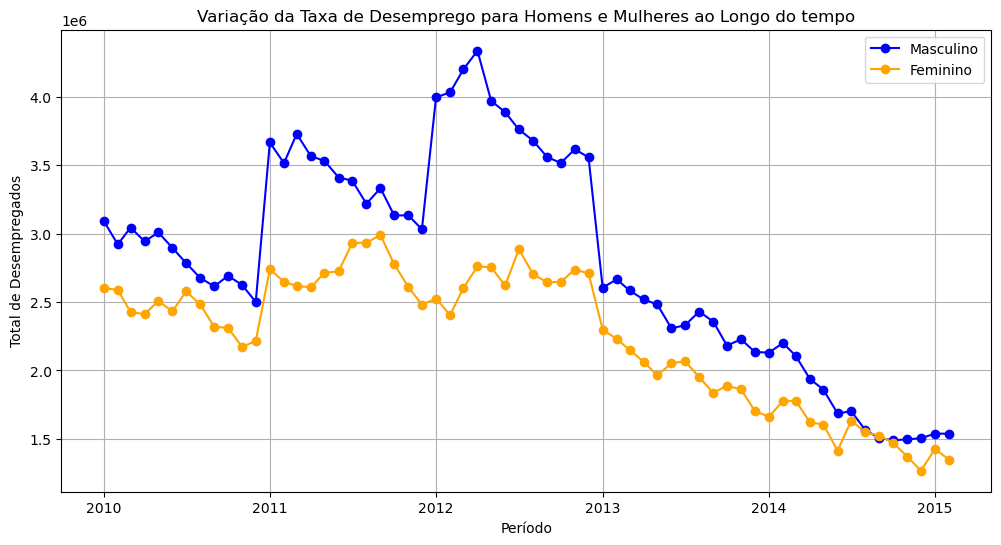

In [60]:
## Gráfico de linha para visualizar a variação da taxa de desemprego 
plt.figure(figsize=(12,6)) 
plt.plot(tabela_pivot_masculino.index, tabela_pivot_masculino['Total_Desempregados'], label='Masculino', marker='o', linestyle='-', color='blue')
plt.plot(tabela_pivot_feminino.index, tabela_pivot_feminino['Total_Desempregados'], label='Feminino', marker='o', linestyle='-', color='orange') 

plt.title('Variação da Taxa de Desemprego para Homens e Mulheres ao Longo do tempo') 
plt.xlabel('Período') 
plt.ylabel('Total de Desempregados') 
plt.legend() 
plt.grid(True) 
plt.show()

## Total de Desempregados por Faixa Etária: 

### 1º) Qual é o total de desempregados varia para homens e mulheres ao longo dos diferentes períodos: 

## Ano

In [70]:
sexo_total_desemprego_ano = desemprego.groupby(["Sexo", "Ano"])["Total_Desempregados"].sum().rename("Total de Desempregados")

analise_desemprego_sexo_ano = pd.DataFrame({"Total de Desempregados" : sexo_total_desemprego_ano})

analise_desemprego_sexo_ano['Total de Desempregados'] = analise_desemprego_sexo_ano['Total de Desempregados'].map(lambda x : "{:,.2f}".format(x))

analise_desemprego_sexo_ano

Total de Desempregados
Sexo      Ano                        
Feminino  2010          29,051,000.00
          2011          32,781,000.00
          2012          32,003,000.00
          2013          24,070,000.00
          2014          18,670,000.00
          2015           2,773,000.00
Masculino 2010          33,807,000.00
          2011          40,665,000.00
          2012          46,127,000.00
          2013          28,832,000.00
          2014          21,184,000.00
          2015           3,076,000.00

## Dia

In [71]:
sexo_total_desemprego_dia = desemprego.groupby(["Sexo", "Dia"])["Total_Desempregados"].sum().rename("Total de Desempregados")

analise_desemprego_sexo_dia = pd.DataFrame({"Total de Desempregados" : sexo_total_desemprego_dia})

analise_desemprego_sexo_dia['Total de Desempregados'] = analise_desemprego_sexo_dia['Total de Desempregados'].map(lambda x : "{:,.2f}".format(x))

analise_desemprego_sexo_dia

,,Total de Desempregados
Sexo,Dia,
Feminino,1,"139,348,000.00"
Masculino,1,"173,691,000.00"


### Mês

In [74]:
sexo_total_desemprego_mes = desemprego.groupby(["Sexo", "Mês"])["Total_Desempregados"].sum().rename("Total de Desempregados")

analise_desemprego_sexo_mes = pd.DataFrame({"Total de Desempregados" : sexo_total_desemprego_mes})

analise_desemprego_sexo_mes['Total de Desempregados'] = analise_desemprego_sexo_mes['Total de Desempregados'].map(lambda x : "{:,.2f}".format(x))

analise_desemprego_sexo_mes

Total de Desempregados
Sexo      Mês                       
Feminino  1            13,256,000.00
          2            12,996,000.00
          3            11,577,000.00
          4            11,467,000.00
          5            11,544,000.00
          6            11,245,000.00
          7            12,100,000.00
          8            11,621,000.00
          9            11,312,000.00
          10           11,098,000.00
          11           10,754,000.00
          12           10,378,000.00
Masculino 1            17,032,000.00
          2            16,877,000.00
          3            15,668,000.00
          4            15,307,000.00
          5            14,856,000.00
          6            14,190,000.00
          7            13,968,000.00
          8            13,572,000.00
          9            13,371,000.00
          10           13,015,000.00
          11           13,102,000.00
          12           12,733,000.00

### Variação do Desemprego por Sexo em Diferentes Períodos: 

### Como a distribuição de desempregados por sexo muda ao longo dos diferentes períodos?


In [92]:
## tabela dinâmica para obter os dados necessários
tabela_pivot = pd.pivot_table(desemprego, values='Total_Desempregados', index='Periodo', columns='Sexo', aggfunc='sum')

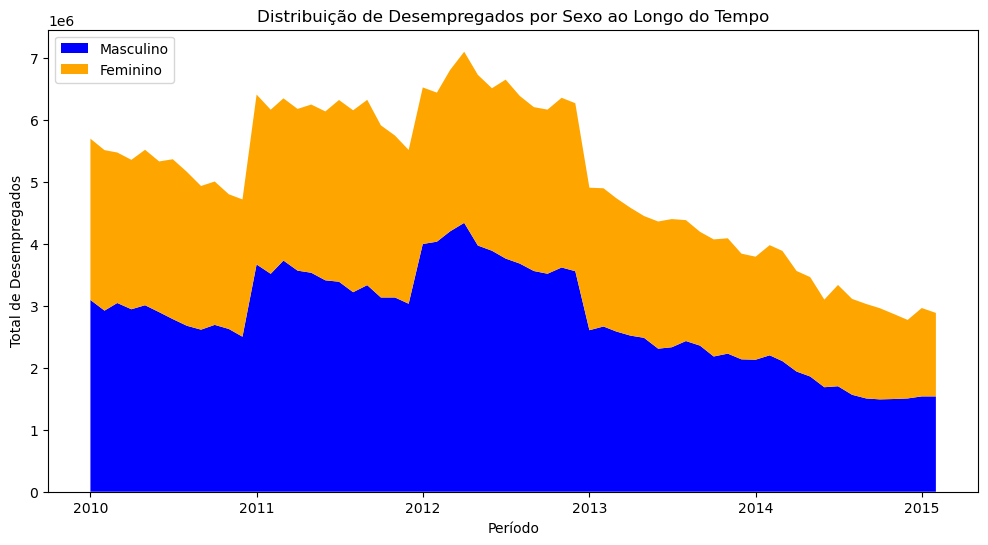

In [94]:
## gráfico de empilhamento de área para visualizar a distribuição de desempregados por sexo ao longo do tempo
plt.figure(figsize=(12, 6))
plt.stackplot(tabela_pivot.index, tabela_pivot['Masculino'], tabela_pivot['Feminino'], labels=['Masculino', 'Feminino'], colors=['blue', 'orange'])
plt.title('Distribuição de Desempregados por Sexo ao Longo do Tempo')
plt.xlabel('Período')
plt.ylabel('Total de Desempregados')
plt.legend(loc='upper left')
plt.show()

### Relação entre Faixa Etária e Total de Desempregados: 

### 1) Há alguma correlação entre a faixa etária e o número total de desempregados ?

In [97]:
## correlação entre a faixa etária e o número total de desempregados
correlacao = desemprego['Range_Idade'].astype('category').cat.codes.corr(desemprego['Total_Desempregados'])

In [100]:
## Resultado
print(f'A correlação entre faixa etária e o número total de desempregados é: {correlacao:.2f}')

A correlação entre faixa etária e o número total de desempregados é: 0.04
